In [66]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark.sql.types import *
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
spark = SparkSession.builder \
   .master("local") \
   .appName("EBD13-EXER") \
   .config("spark.executor.memory", "800mb") \
   .getOrCreate()
   
sc = spark.sparkContext
sqlContext = SQLContext(sc)

df = sqlContext.read.option("delimiter", ';').load('file:///home/admin/Notebooks/acidentes-2016.csv', 
                      format='com.databricks.spark.csv', 
                      header='true', 
                      inferSchema='true')

In [15]:
df.createOrReplaceTempView("table_acidentes")

In [63]:
df2 = spark.sql("Select sum(MORTES) from table_acidentes")
df2.collect()

[Row(sum(MORTES)=47)]

In [65]:
df2 = spark.sql("Select DIA_SEM, sum(MORTES) from table_acidentes GROUP BY DIA_SEM")
df2.collect()

pandas_df = df2.toPandas()
pandas_df['iter'] = 0

for idx, val in pandas_df.iterrows():
    print("evaluating " + str(val[0]))
    if val[0]== 'SEGUNDA-FEIRA':
        pandas_df.iloc[idx, 2] = 0
    if val[0] == 'TERCA-FEIRA':
        pandas_df.iloc[idx, 2] = 1
    if val[0] == 'QUARTA-FEIRA':
        pandas_df.iloc[idx, 2]= 2
    if val[0] == 'QUINTA-FEIRA':
        pandas_df.iloc[idx, 2] = 3
    if val[0] == 'SEXTA-FEIRA':
        pandas_df.iloc[idx, 2] = 4
    if val[0] == 'SABADO':
        pandas_df.iloc[idx, 2] = 5
    if val[0] == 'DOMINGO':
        pandas_df.iloc[idx, 2] = 6


pandas_df.sort_values(by=['iter'], inplace=True)

evaluating DOMINGO
evaluating QUARTA-FEIRA
evaluating TERCA-FEIRA
evaluating SEXTA-FEIRA
evaluating SEGUNDA-FEIRA
evaluating SABADO
evaluating QUINTA-FEIRA


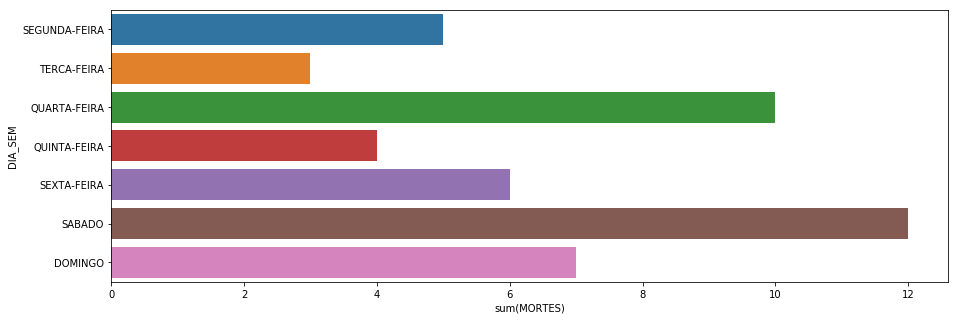

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(ax=ax, x='sum(MORTES)', y = 'DIA_SEM', data=pandas_df, orient="h")
fig.savefig('dead_by_week.png')

In [90]:
df2 = spark.sql("Select DIA_SEM, count(*) from table_acidentes GROUP BY DIA_SEM")
df2.collect()

pandas_df = df2.toPandas()
pandas_df['iter'] = 0

for idx, val in pandas_df.iterrows():
    print("evaluating " + str(val[0]))
    if val[0]== 'SEGUNDA-FEIRA':
        pandas_df.iloc[idx, 2] = 0
    if val[0] == 'TERCA-FEIRA':
        pandas_df.iloc[idx, 2] = 1
    if val[0] == 'QUARTA-FEIRA':
        pandas_df.iloc[idx, 2]= 2
    if val[0] == 'QUINTA-FEIRA':
        pandas_df.iloc[idx, 2] = 3
    if val[0] == 'SEXTA-FEIRA':
        pandas_df.iloc[idx, 2] = 4
    if val[0] == 'SABADO':
        pandas_df.iloc[idx, 2] = 5
    if val[0] == 'DOMINGO':
        pandas_df.iloc[idx, 2] = 6


pandas_df.sort_values(by=['iter'], inplace=True)

evaluating DOMINGO
evaluating QUARTA-FEIRA
evaluating TERCA-FEIRA
evaluating SEXTA-FEIRA
evaluating SEGUNDA-FEIRA
evaluating SABADO
evaluating QUINTA-FEIRA


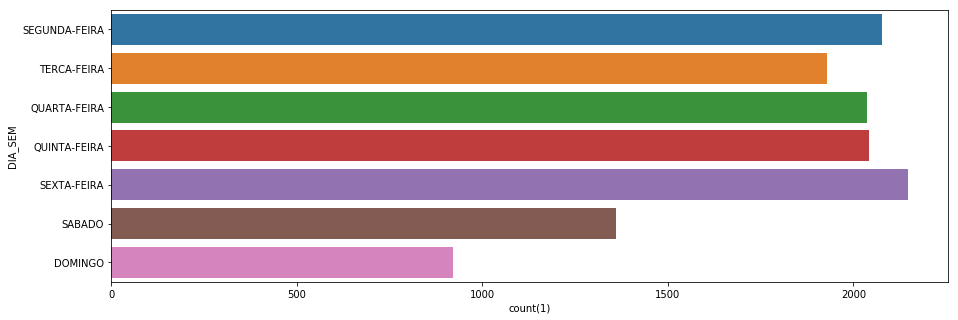

In [92]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(ax=ax, x='count(1)', y = 'DIA_SEM', data=pandas_df, orient="h")
fig.savefig('acid_by_weekday.png')

In [78]:
df2 = spark.sql("Select TIPO_ACID, count(*) from table_acidentes GROUP BY TIPO_ACID")
df2.collect()

pandas_df = df2.toPandas()

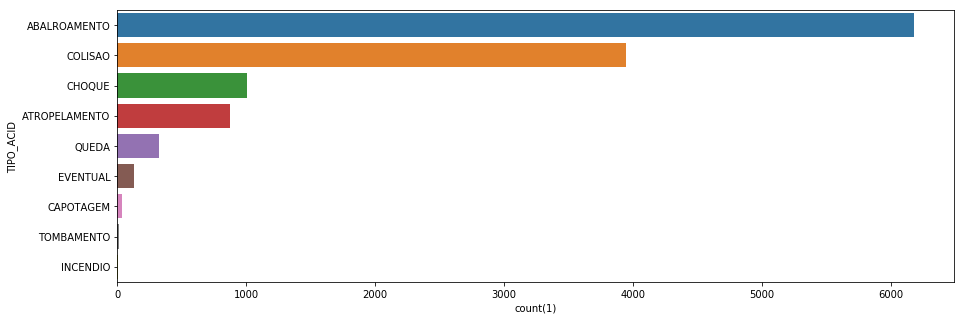

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(ax=ax, x='count(1)', y = 'TIPO_ACID', data=pandas_df.sort_values(by=['count(1)'], ascending=False), orient="h")
fig.savefig('tipo_acid.png')